<a href="https://colab.research.google.com/github/ManishKr19/Edureka-Data-Science/blob/main/LoanBorrower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as pt
import seaborn as sns

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv('/content/loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [21]:
df["revol.util"] = df[df["revol.util"] <= 70.9]
df['revol.bal'].fillna(df['revol.bal'].median(), inplace=True)

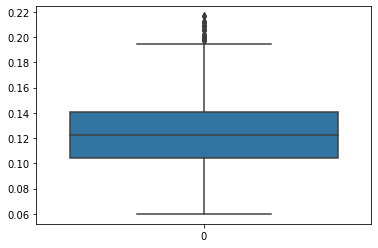

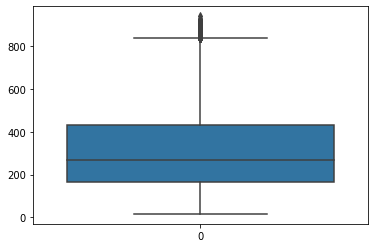

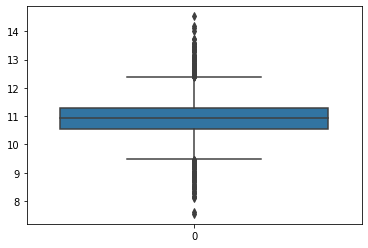

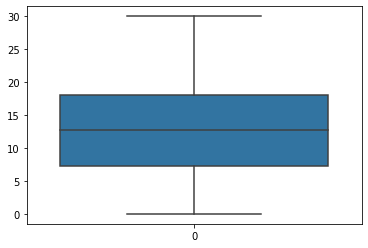

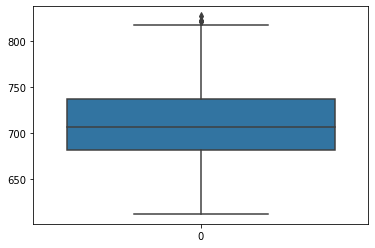

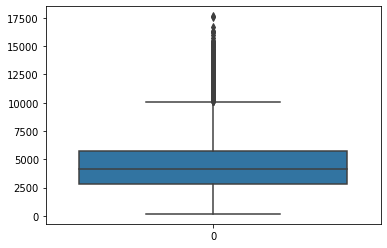

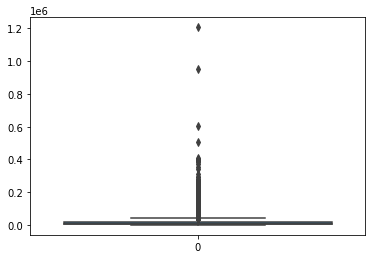

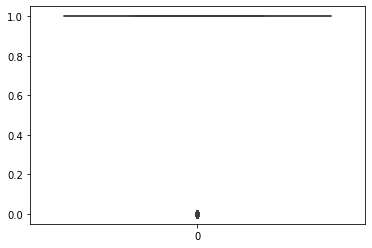

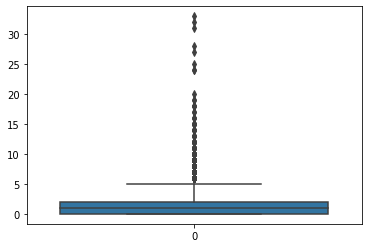

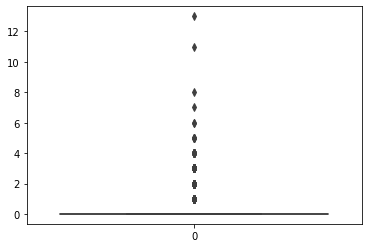

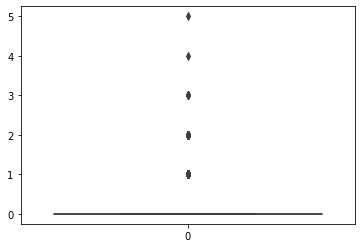

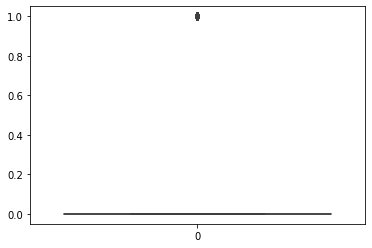

In [26]:
for it in df.columns[2:]:
  sns.boxplot(data=df[it])
  plt.show()

In [27]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,33.000000,13.000000,5.000000,1.000000


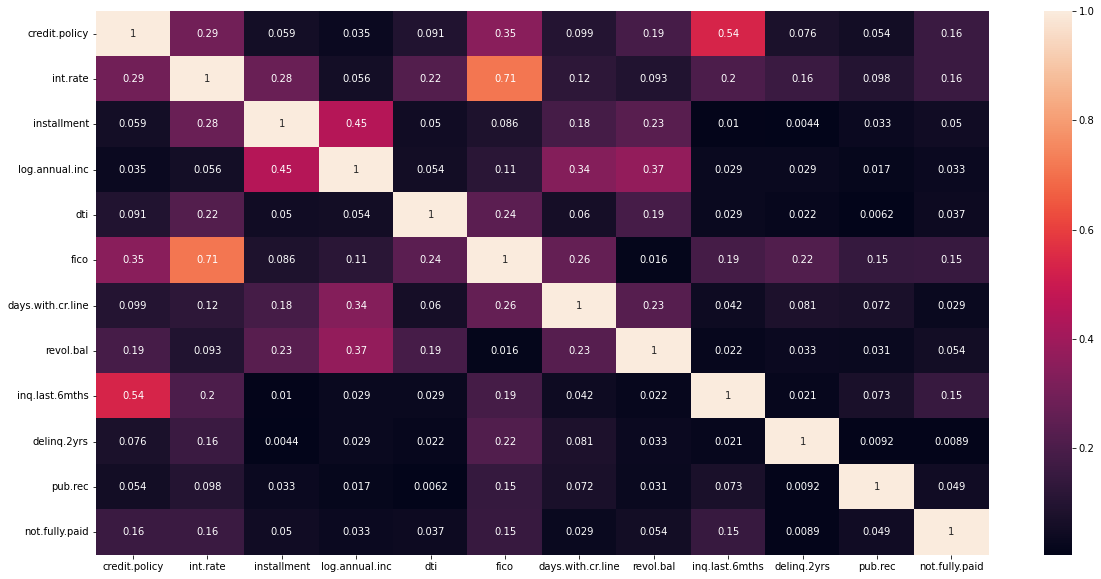

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr().abs(), annot = True)

In [30]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [38]:
df.drop(['purpose'], axis = 1, inplace=True)

KeyError: ignored

In [39]:
df.fillna(0, inplace=True)

In [40]:

X = df.drop(['not.fully.paid'], axis = 1)
y = df['not.fully.paid']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 68)

In [42]:
# call
log_reg = LogisticRegression(max_iter = 1000)

# fit 
log_reg.fit(X_train, y_train)

# predict 
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

In [43]:
print(log_reg.predict_proba(X_test))

[[0.84483463 0.15516537]
 [0.82742061 0.17257939]
 [0.84279797 0.15720203]
 ...
 [0.84840338 0.15159662]
 [0.81223021 0.18776979]
 [0.88175582 0.11824418]]


In [44]:
porb_preds = log_reg.predict_proba(X_test)
porb_preds
predictions = []
for x in porb_preds:
    if x[0] > 0.99:
        predictions.append(0)
    else:
        predictions.append(1)
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [45]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

print("true negative:", tn)
print("false positive:", fp)
print("false negative:", fn)
print("true positive:", tp)

true negative: 1621
false positive: 0
false negative: 295
true positive: 0


In [46]:
from sklearn.metrics import classification_report

cr = classification_report(y_train, y_pred_train)

print(cr)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6424
           1       0.50      0.00      0.00      1238

    accuracy                           0.84      7662
   macro avg       0.67      0.50      0.46      7662
weighted avg       0.78      0.84      0.76      7662



In [49]:
#call the fmodel 

dt = DecisionTreeClassifier('entropy')

# fit # gini---> entropy 

dt.fit(X_train, y_train)

# predict 

y_pred_test = dt.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)

Accuracy: 0.755
Precision: 0.193
Recall: 0.186
F1-score: 0.190


In [47]:
from sklearn.ensemble import RandomForestClassifier


# call 
rf = RandomForestClassifier(n_estimators = 100)
#fit 
rf.fit(X_train, y_train)
#predict 
y_pred_test = rf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')

Accuracy: 0.842
Precision: 0.300
Recall: 0.020


In [51]:
# boosting 

# CAN YOU APPLY boosting using SKLEARN --->

import xgboost
from xgboost import XGBClassifier

In [52]:
# call 
xgb = XGBClassifier()

#fit 
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
y_pred_test = xgb.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %.3f' % accuracy)

precision = precision_score(y_test, y_pred_test, average='binary')
print('Precision: %.3f' % precision)

recall = recall_score(y_test, y_pred_test, average='binary')
print('Recall: %.3f' % recall)

f1_score = f1_score(y_test, y_pred_test, average='binary')
print('F1-score: %.3f' % f1_score)

Accuracy: 0.846
Precision: 0.429
Recall: 0.010
F1-score: 0.020
